# 1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

The bank management team would like to build and train a simple deep neural network model to predict the likelihood 
of a liability customer (depositor) buying personals loans based on customer features like age, experience, income
location, family, education, existing mortgage, and credit card



In [1]:
#2: IMPORT DATASETS AND LIBRARIES


!pip install jupyterthemes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 



/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load dataset
Bank_df = pd.read_csv('UniversalBank.csv')

In [4]:
Bank_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [5]:
Bank_df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [6]:
# Visualize dataset
Bank_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


# #3: PERFORM EXPLORATORY DATA ANALYSIS

In [7]:
# Obtain dataframe info
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
# Obtain the statistical summary of the dataframe
Bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
# For better visualization
Bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [10]:
# See how many null values exist in the dataframe
Bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
# What is the % of customers who have credit cards

creditcard_customers = Bank_df[Bank_df['CreditCard']==1]
creditcard_customers

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
15,16,60,30,22,95054,1,1.5,3,0,0,0,0,1,1
19,20,55,28,21,94720,1,0.5,2,0,0,1,0,0,1
24,25,36,11,152,95521,2,3.9,1,159,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,4985,27,1,98,94043,4,2.3,3,0,0,0,0,0,1
4988,4989,34,8,85,95134,1,2.5,1,136,0,0,0,0,1
4990,4991,55,25,58,95023,4,2.0,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.9,2,100,0,0,0,0,1


In [12]:
#checkinh the length of the creditcard_customers

len(creditcard_customers)

1470

In [13]:
#. % of customers who have credit cards

cc_customers_percent = len(creditcard_customers)/len(Bank_df)*100

print('Percentage of customers who have credit cards with Universal Bank = ', cc_customers_percent, '%')

Percentage of customers who have credit cards with Universal Bank =  29.4 %


In [14]:
# What is the % of customers who accepted the personal loan?

accepted_customers = Bank_df[Bank_df['Personal Loan']==1]

accepted_customers

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


In [15]:
# What is the % of customers who accepted the personal loan?

accepted_customers_percent = len(accepted_customers)/len(Bank_df)*100

print('Percentage of customers who have accepedt personal loans from  Universal Bank = ', accepted_customers_percent,'%')

Percentage of customers who have accepedt personal loans from  Universal Bank =  9.6 %


# 4: PERFORM DATA VISUALIZATION

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

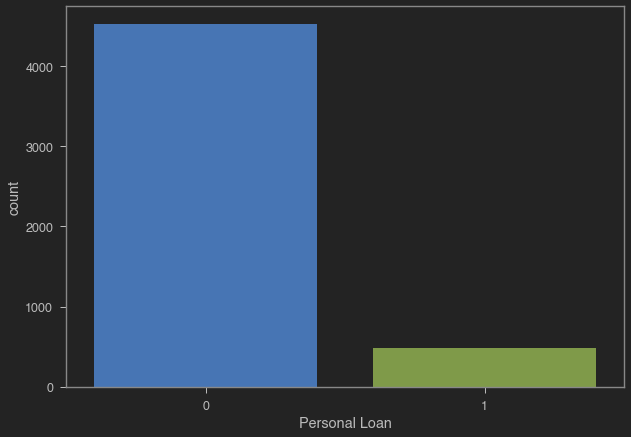

In [16]:
# Visualize personal Loan column 
# Percentage of customers who accepted personal loan ~ 9%

plt.figure(figsize = (10, 7))

sns.countplot(Bank_df['Personal Loan'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

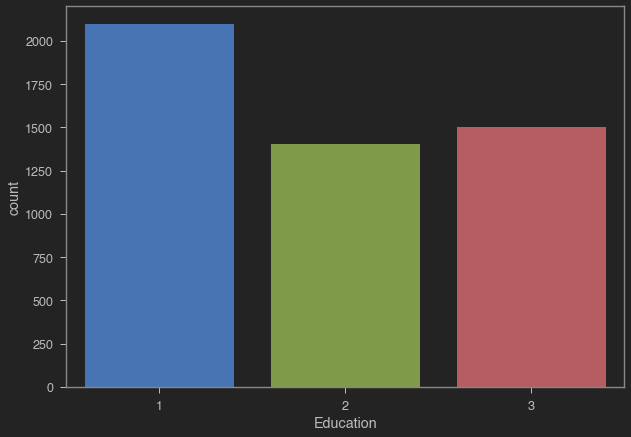

In [17]:
# Visualize Education feature

plt.figure(figsize = (10, 7))

sns.countplot(Bank_df['Education'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

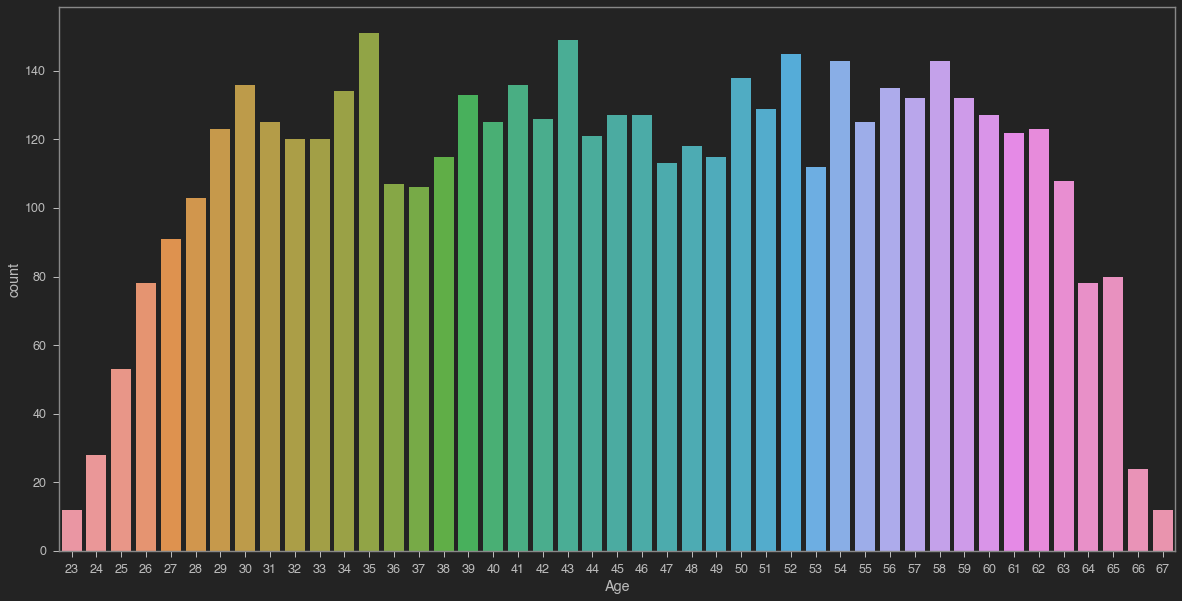

In [18]:
# Visualize Age
# Uniform distribution between 30-60 years

plt.figure(figsize = (20, 10))

sns.countplot(Bank_df['Age'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditCard', ylabel='count'>

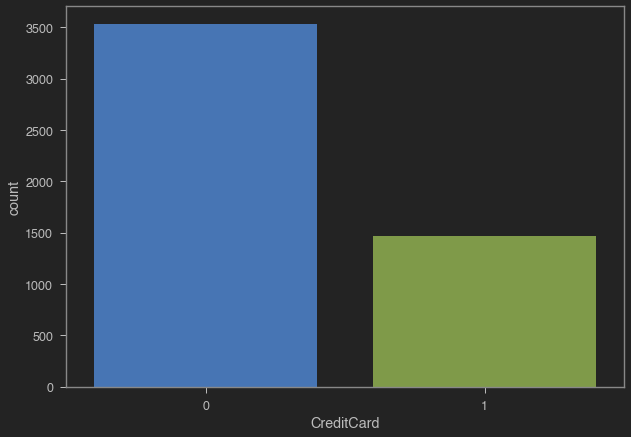

In [19]:
# Visualize credit card availability feature
# Recall that ~29% of customers have credit cards

plt.figure(figsize = (10, 7))

sns.countplot(Bank_df['CreditCard'])



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

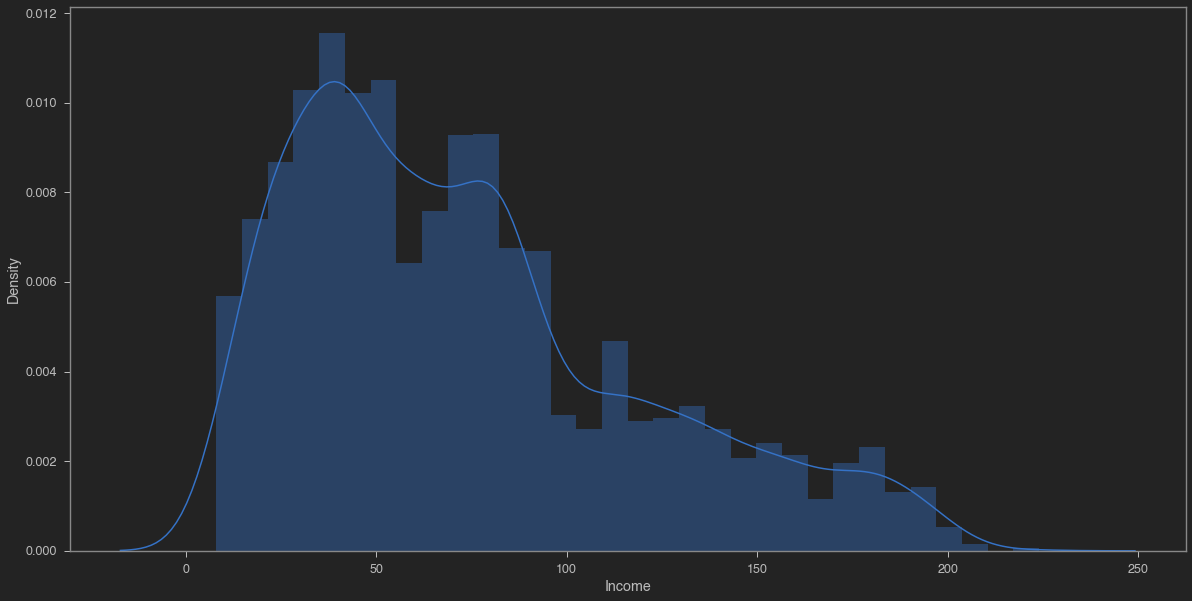

In [20]:
# Visualize income data
# Most customers have incomes that range between 45K and 60K per year
# Data is skewed with less customers earning above 100K

plt.figure(figsize = (20, 10))

sns.distplot(Bank_df['Income'])

In [21]:
# Create two dataframes for the two classes
personalloans = Bank_df[Bank_df['Personal Loan'] == 1]
no_personalloans = Bank_df[Bank_df['Personal Loan'] == 0]

In [22]:
# checking dataframe for personalloans

personalloans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


In [23]:
# Mean income of customers who have personal loans is generally high ~ 144K and average CC of 3.9K

personalloans.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,480.0,2390.650000,1394.393674,10.0,1166.50,2342.0,3566.0000,4981.0
Age,480.0,45.066667,11.590964,26.0,35.00,45.0,55.0000,65.0
Experience,480.0,19.843750,11.582443,0.0,9.00,20.0,30.0000,41.0
Income,480.0,144.745833,31.584429,60.0,122.00,142.5,172.0000,203.0
ZIP Code,480.0,93153.202083,1759.223753,90016.0,91908.75,93407.0,94705.5000,96008.0
Family,480.0,2.612500,1.115393,1.0,2.00,3.0,4.0000,4.0
CCAvg,480.0,3.905354,2.097681,0.0,2.60,3.8,5.3475,10.0
Education,480.0,2.233333,0.753373,1.0,2.00,2.0,3.0000,3.0
Mortgage,480.0,100.845833,160.847862,0.0,0.00,0.0,192.5000,617.0
Personal Loan,480.0,1.000000,0.000000,1.0,1.00,1.0,1.0000,1.0


In [24]:
# checking dataframe for no_personalloans

no_personalloans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [25]:
# Mean income of customers who have do not have personal loans is generally low ~ 66K and average CC of 1.7K

no_personalloans.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4520.0,2512.165487,1448.299331,1.0,1259.75,2518.5,3768.25,5000.0
Age,4520.0,45.367257,11.450427,23.0,35.00,45.0,55.00,67.0
Experience,4520.0,20.132301,11.456672,-3.0,10.00,20.0,30.00,43.0
Income,4520.0,66.237389,40.578534,8.0,35.00,59.0,84.00,224.0
ZIP Code,4520.0,93152.428761,2156.949654,9307.0,91911.00,93437.0,94608.00,96651.0
Family,4520.0,2.373451,1.148771,1.0,1.00,2.0,3.00,4.0
CCAvg,4520.0,1.729009,1.567647,0.0,0.60,1.4,2.30,8.8
Education,4520.0,1.843584,0.839975,1.0,1.00,2.0,3.00,3.0
Mortgage,4520.0,51.789381,92.038931,0.0,0.00,0.0,98.00,635.0
Personal Loan,4520.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

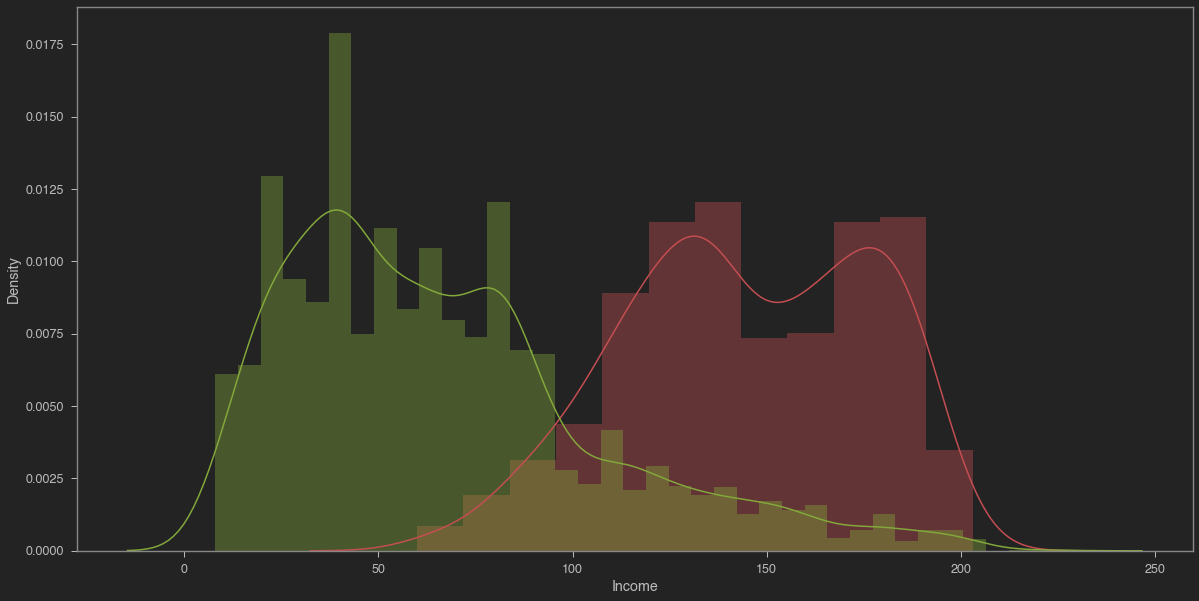

In [26]:
# Plot the distribution plot for both classes separately 
# Customers who took personal loans tend to have higher income
plt.figure(figsize = (20, 10))

sns.distplot(personalloans['Income'], color = 'r')

sns.distplot(no_personalloans['Income'], color = 'g')

<Figure size 2160x2160 with 0 Axes>

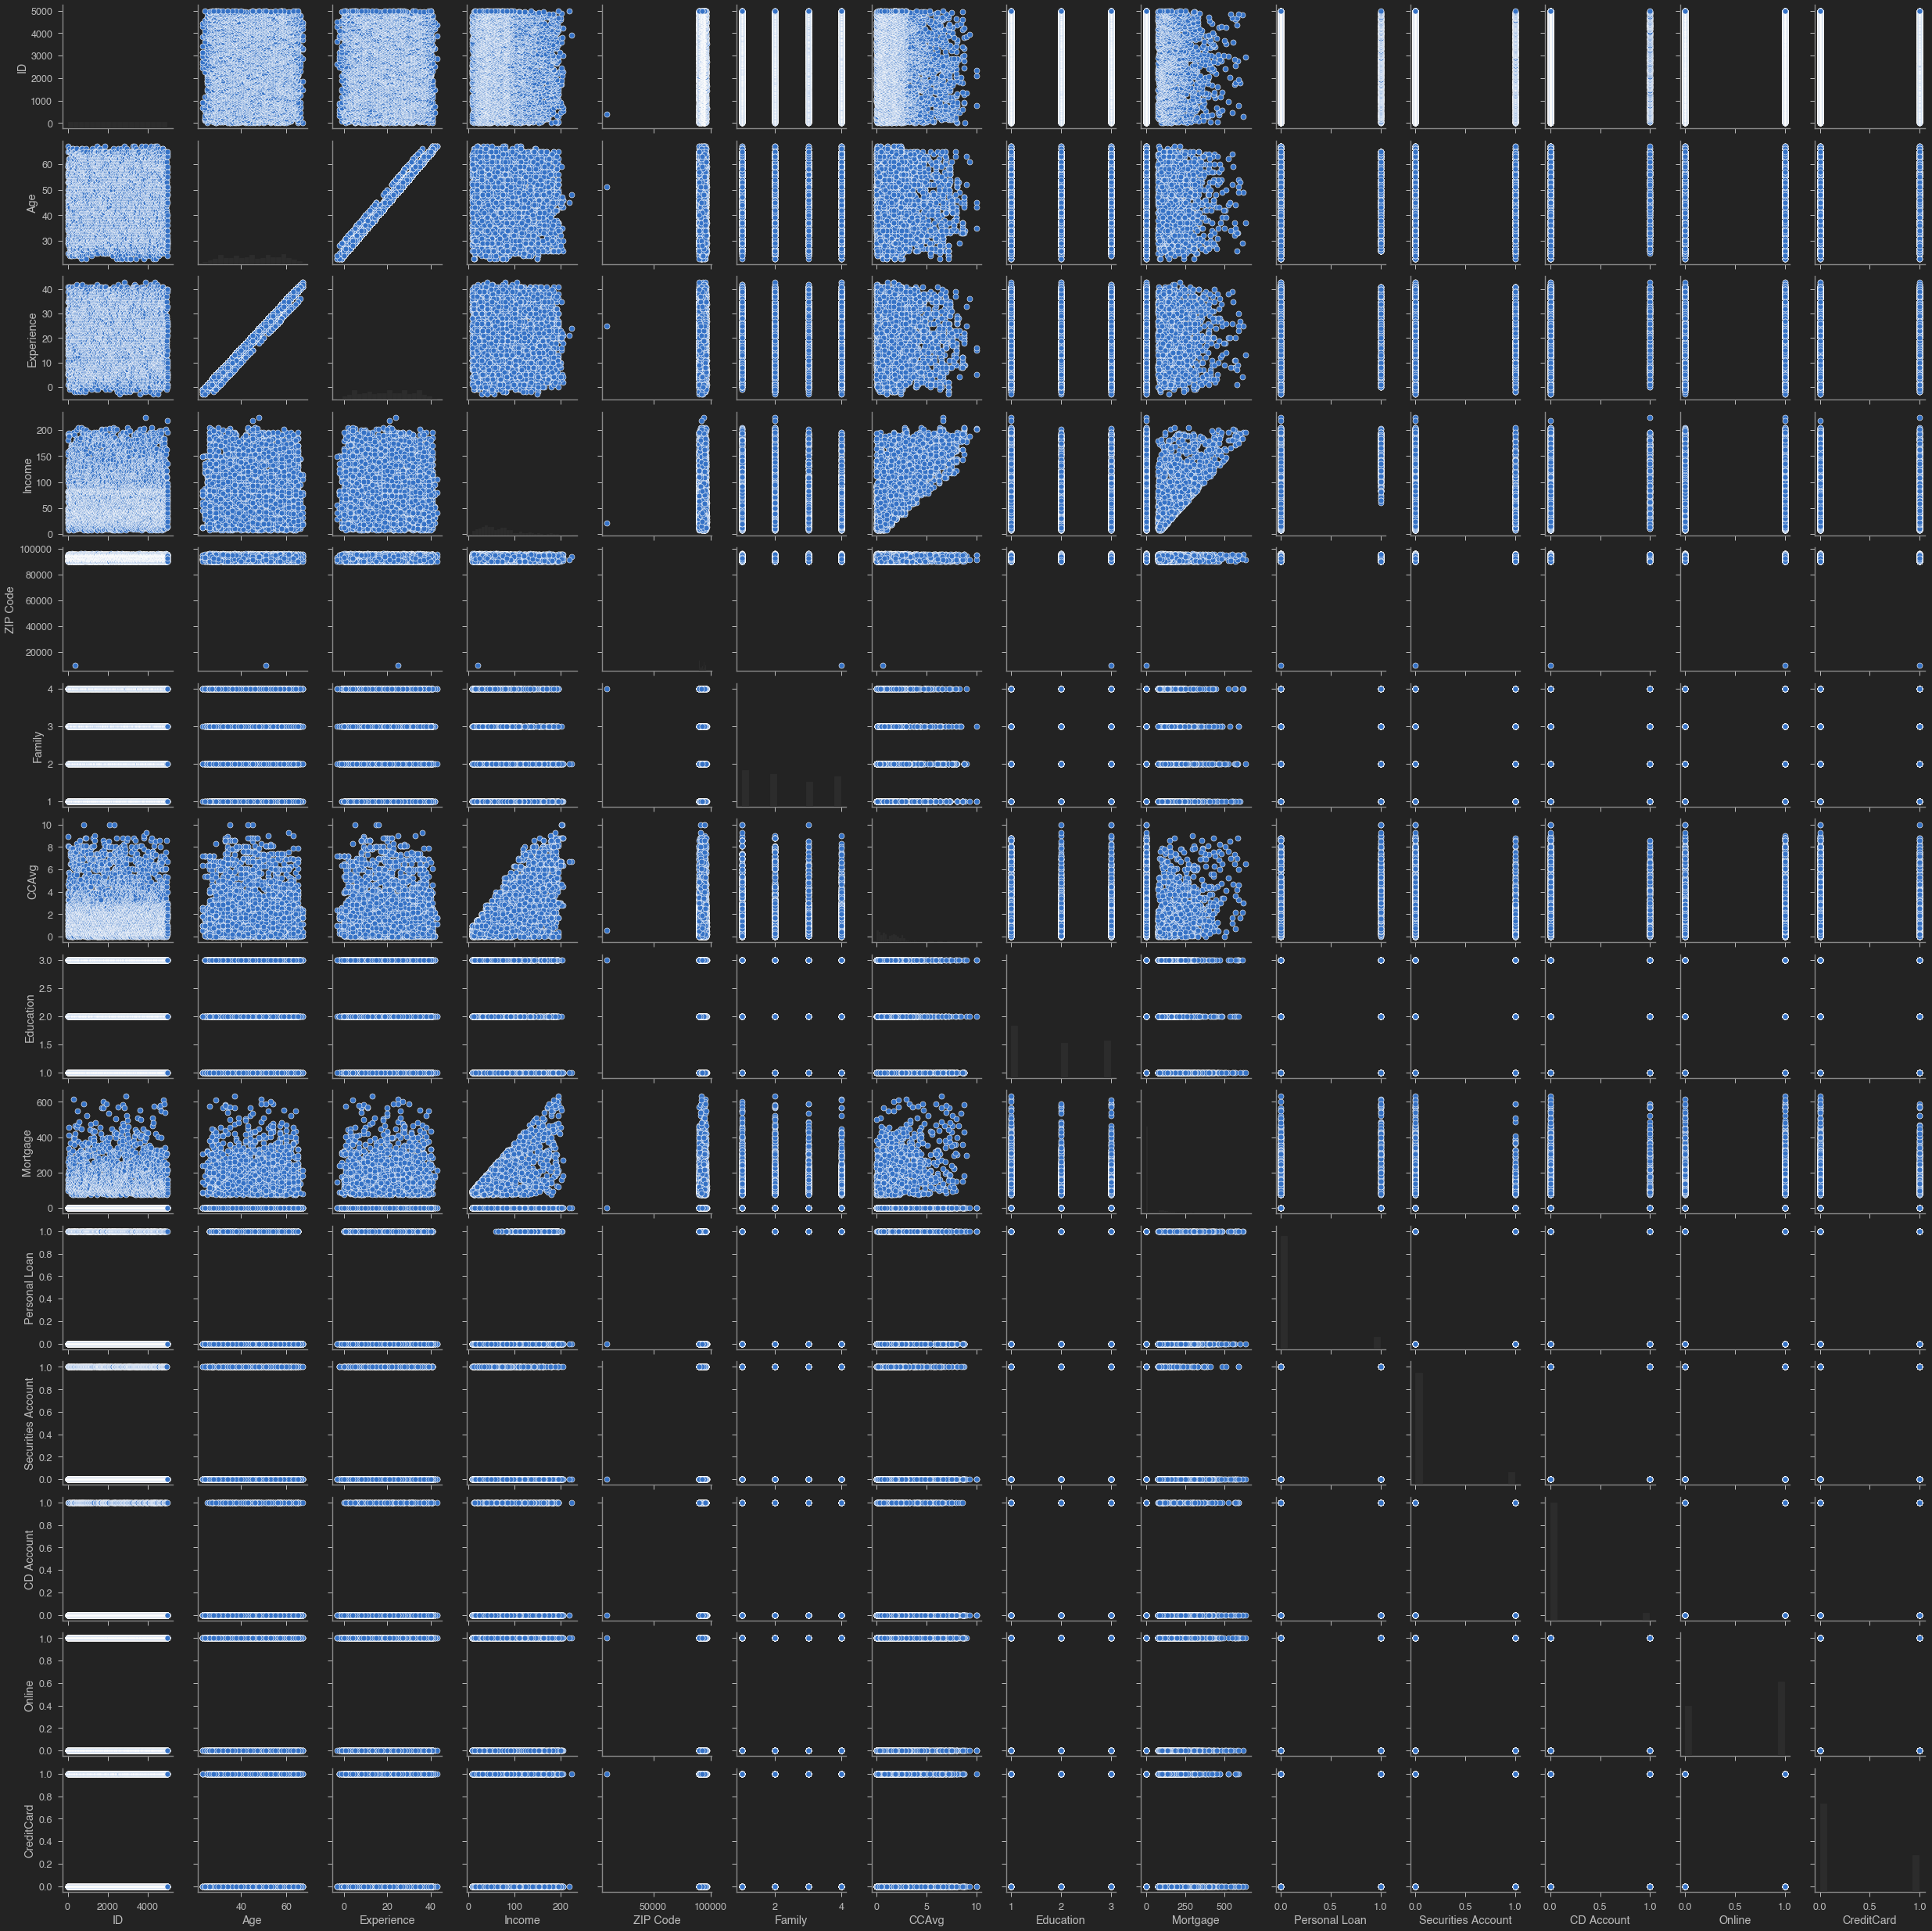

In [27]:
# Plot pairplot
plt.figure(figsize = (30, 30))

sns.pairplot(Bank_df)

<AxesSubplot:>

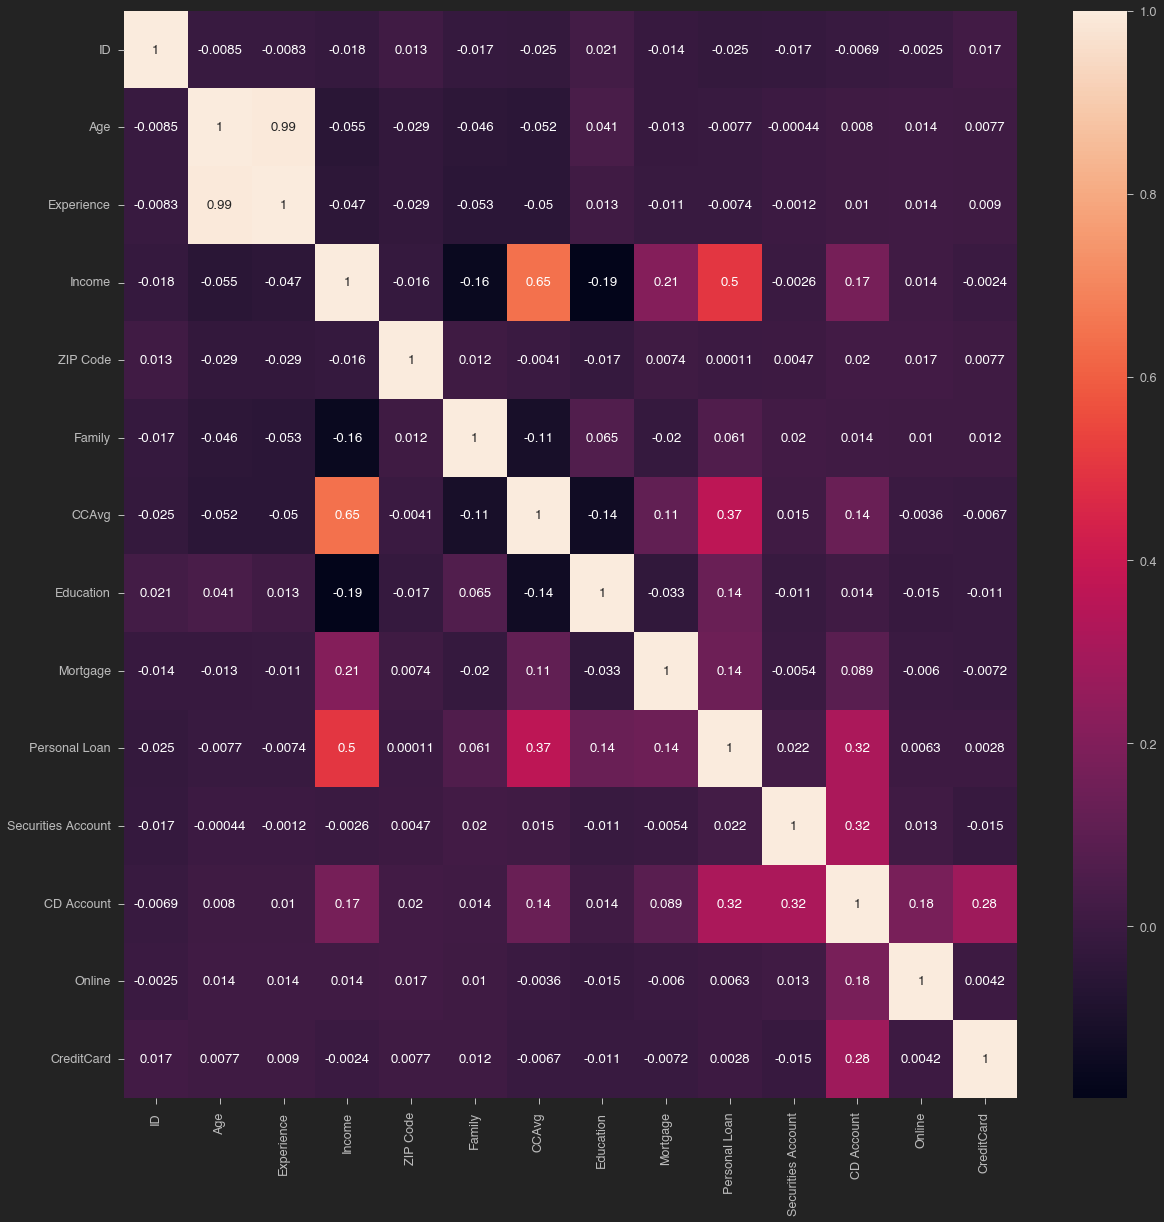

In [28]:
# Correlation plot
# Stong Positive correlation between experience and age
# Strong positive correlation between CC average and income
plt.figure(figsize = (20, 20))

cm = Bank_df.corr()

sns.heatmap(cm, annot = True)




/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

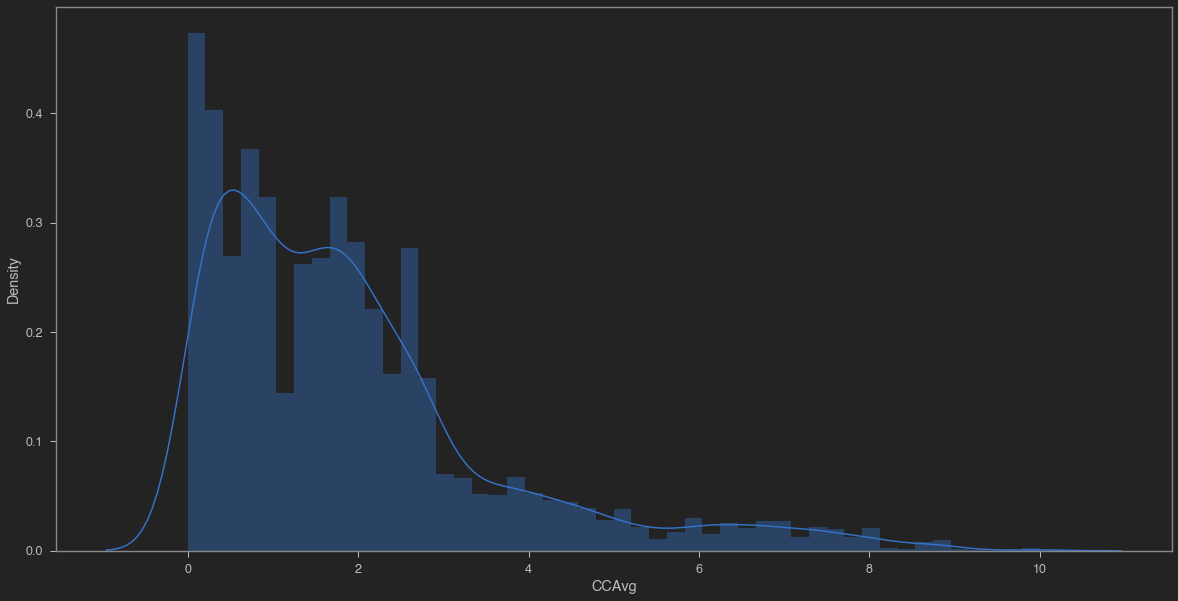

In [29]:
# Visualize the data
# Most customers Credit card spending is between 0-4K 
# Data is positively skewed 
plt.figure(figsize = (20, 10))
sns.distplot(Bank_df['CCAvg'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

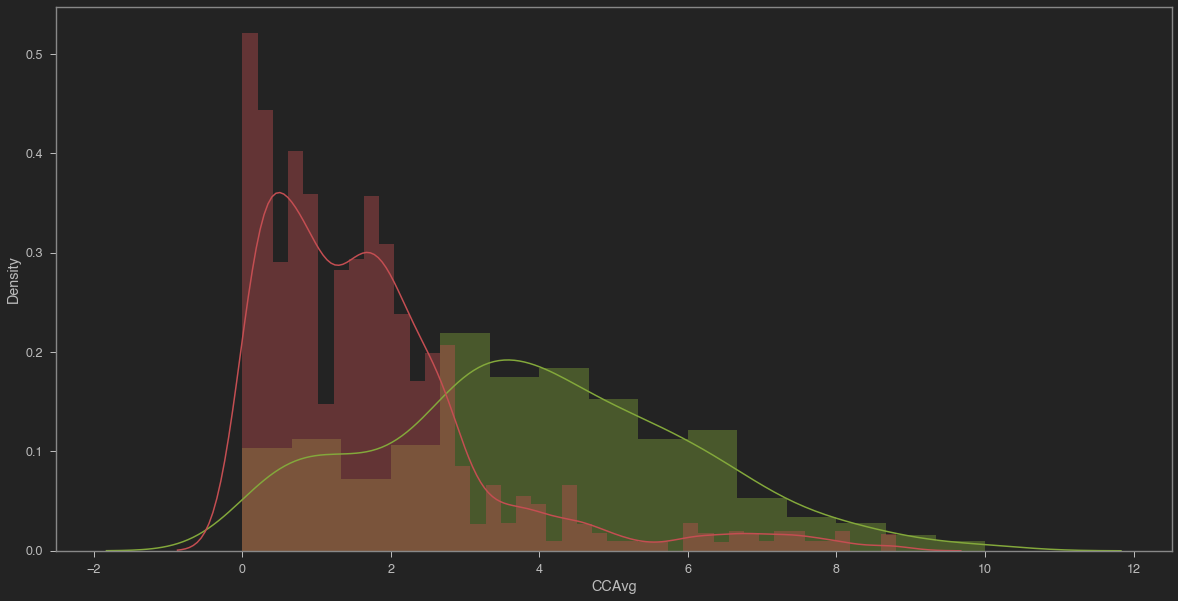

In [30]:
# Plot the distribution plot for both classes separately 
# Customers who have large CC Average tend to have personal loans
plt.figure(figsize = (20, 10))
sns.distplot(personalloans['CCAvg'], color = 'g')
sns.distplot(no_personalloans['CCAvg'], color = 'r')

# 5: PREPARE THE DATA BEFORE TRAINING THE MODEL

In [31]:
# List all column names
Bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [32]:
# Specify model input features (all data except for the target variable) 
x = Bank_df.drop(columns = ['Personal Loan'])

x

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [33]:
# Model output (target variable)
y = Bank_df['Personal Loan']

y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [34]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [35]:
!pip install sklearn

In [36]:
# scale the data before training the model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()

x = scaler_x.fit_transform(x)



In [37]:
# spliting the data into testing and training sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [38]:
# print the shapes
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4500, 13), (500, 13), (4500, 2), (500, 2))

# 7: BUILD A SIMPLE MULTI LAYER NEURAL NETWORK MODEL

In [39]:
# Create keras sequential model
ANN_model = keras.Sequential()

# Add dense layer
ANN_model.add(Dense(250, input_dim = 13, kernel_initializer = 'normal',activation = 'relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation = 'relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation = 'relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation = 'relu'))

ANN_model.add(Dropout(0.4))
ANN_model.add(Dense(250, activation = 'linear'))

ANN_model.add(Dropout(0.4))



# Add dense layer with softmax activation
ANN_model.add(Dense(2, activation = 'softmax'))
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               3500      
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               125500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               2

2023-08-07 21:16:53.665821: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 8: COMPILE AND TRAIN DEEP LEARNING MODEL

In [40]:
# Compile the model
ANN_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])



In [41]:
history = ANN_model.fit(x_train, y_train, epochs = 20, validation_split = 0.2, verbose = 1)

Epoch 1/20
113/113 [==============================] - 3s 16ms/step - loss: 0.1679 - accuracy: 0.9414 - val_loss: 0.0900 - val_accuracy: 0.9633
Epoch 2/20
113/113 [==============================] - 2s 15ms/step - loss: 0.0959 - accuracy: 0.9683 - val_loss: 0.0670 - val_accuracy: 0.9778
Epoch 3/20
113/113 [==============================] - 2s 14ms/step - loss: 0.0848 - accuracy: 0.9703 - val_loss: 0.0674 - val_accuracy: 0.9733
Epoch 4/20
113/113 [==============================] - 1s 10ms/step - loss: 0.0762 - accuracy: 0.9733 - val_loss: 0.0631 - val_accuracy: 0.9767
Epoch 5/20
113/113 [==============================] - 1s 12ms/step - loss: 0.0750 - accuracy: 0.9728 - val_loss: 0.0564 - val_accuracy: 0.9800
Epoch 6/20
113/113 [==============================] - 2s 16ms/step - loss: 0.0627 - accuracy: 0.9775 - val_loss: 0.0528 - val_accuracy: 0.9811
Epoch 7/20
113/113 [==============================] - 2s 13ms/step - loss: 0.0655 - accuracy: 0.9781 - val_loss: 0.0620 - val_accuracy: 0.9778

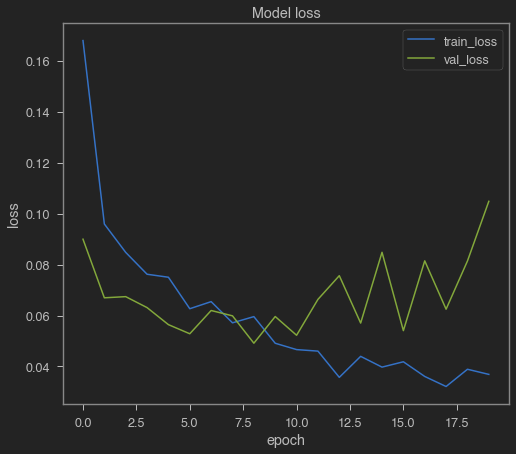

In [42]:
# Plot the model performance across epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

# 9: ASSESS THE PERFORMANCE OF THE TRAINED MODEL

In [43]:
# Make predictions
predictions = ANN_model.predict(x_test)

# Append the index of max value using argmax function
predict = []
for i in predictions:
    predict.append(np.argmax(i))

In [44]:
# Get the acccuracy of the model
result = ANN_model.evaluate(x_test, y_test)

print("Accuracy : {}".format(result[1]))

16/16 [==============================] - 0s 4ms/step - loss: 0.1611 - accuracy: 0.9700
Accuracy : 0.9700000286102295


In [45]:
# Get the original values
y_original = []

for i in y_test:
    y_original.append(np.argmax(i))

<AxesSubplot:>

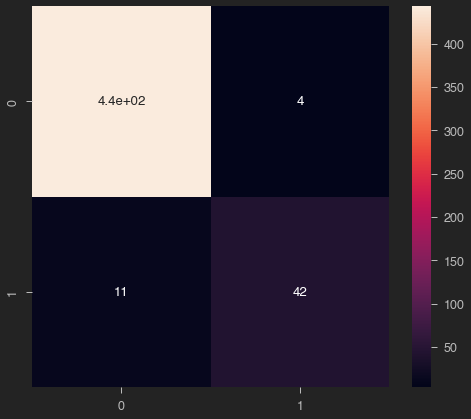

In [46]:
# Plot Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_original, predict)

sns.heatmap(confusion_matrix, annot = True)



In [47]:
# Print out the classification report
from sklearn.metrics import classification_report
print(classification_report (y_original, predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       447
           1       0.91      0.79      0.85        53

    accuracy                           0.97       500
   macro avg       0.94      0.89      0.92       500
weighted avg       0.97      0.97      0.97       500

